# CAPSTONE PROJECT


Osteosarcoma is the most common type of bone cancer that occurs in adolescents in the age of 10 to 14 years. The dataset is composed of Hematoxylin and eosin (H&E) stained osteosarcoma histology images. The data was collected by a team of clinical scientists at University of Texas Southwestern Medical Center, Dallas. Archival samples for 50 patients treated at Children’ s Medical Center, Dallas, between 1995 and 2015, were used to create this dataset. Four patients (out of 50) were selected by pathologists based on diversity of tumor specimens after surgical resection. The images are labelled as Non-Tumor, Viable Tumor and Necrosis according to the predominant cancer type in each image. The annotation was performed by two medical experts. All images were divided between two pathologists for the annotation activity. Each image had a single annotation as any given image was annotated by only one pathologist. The dataset consists of 1144 images of size 1024 X 1024 at 10X resolution with the following distribution: 536 (47%) non-tumor images, 263 (23%) necrotic tumor images and 345 (30%) viable tumor tiles.

##### DATASET SUMMARY:<br>
The dataset consists of 1144 images of size 1024 X 1024 at 10X resolution with the following distribution: 536 (47%) non-tumor images, 263 (23%) necrotic tumor images and 345 (30%) viable tumor tiles.


#### Necessary packages needed for this project

In [5]:
pip install imutils


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Packages 

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

In [9]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [10]:
set1=glob('/Users/bharathamadhukiran/Desktop/capstone/Osteosarcoma-UT/Training-Set-1/set1/*.jpg')

In [15]:
img_mpl = plt.imread(set1[20])

img_cv2 = cv2.imread(set1[20])

In [16]:
img_mpl.shape, img_cv2.shape

((1024, 1024, 3), (1024, 1024, 3))

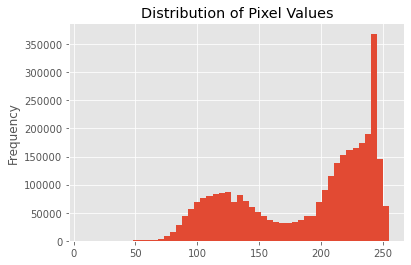

In [17]:
pd.Series(img_cv2.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

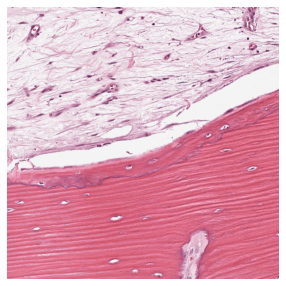

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

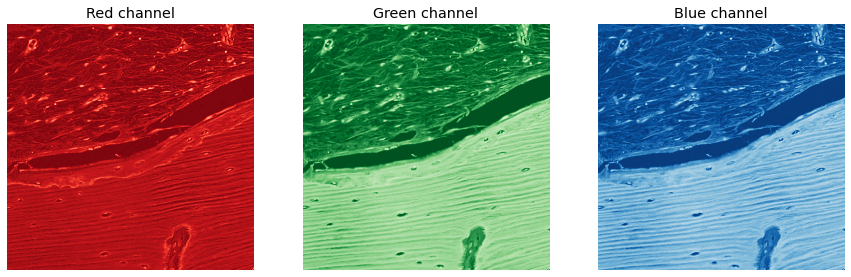

In [19]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

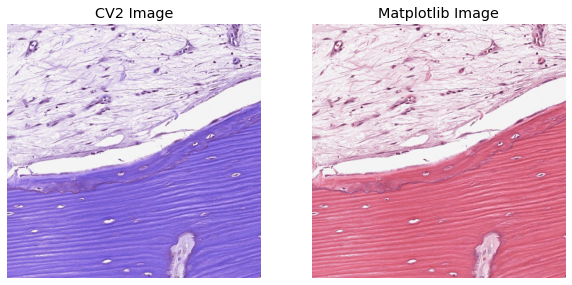

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

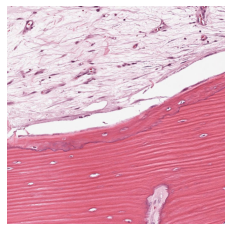

In [21]:
 # Converting from BGR to RGB
img_mpl_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_mpl_cv2)
ax.axis('off')
plt.show()

### Image manipulation

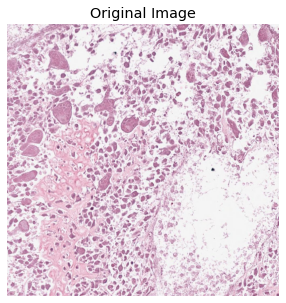

In [22]:
img = plt.imread(set1[4])
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img)
ax.axis('off')
ax.set_title('Original Image')
plt.show()

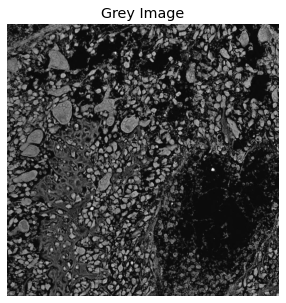

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [24]:
# Converting the images to grey scale images
data=pd.DataFrame()
import os
rootdir = '/Users/bharathamadhukiran/Desktop/capstone/Osteosarcoma-UT/Training-Set-1'
images=[];
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        img = cv2.imread(os.path.join(subdir, file))
        if img is not None:
            # normalize values
            #img = img / 255
            img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            img_gray2 = cv2.resize(img_gray, (200, 200))
            
            images.append(img_gray2)
            print("Loaded image with shape:", img_gray2.shape)
            #print(os.path.join(subdir, file))         
        elif file=='.DS_Store':
            continue
        else:
            print("Could not load image:", file)
            df1=pd.read_csv(str(subdir)+'/'+str(file),header=None)
            df1.head()
            data=pd.concat([data,df1])

            
            

     

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

In [25]:
images

[array([[252, 237, 248, ..., 229, 225, 229],
        [210, 246, 237, ..., 208, 205, 232],
        [141, 249, 241, ..., 233, 229, 230],
        ...,
        [150, 179, 206, ..., 173, 159, 206],
        [163, 233, 228, ..., 151, 156, 122],
        [150, 192, 166, ..., 196, 209, 189]], dtype=uint8),
 array([[ 98,  94,  96, ...,  95,  86,  85],
        [ 96, 111, 102, ...,  95,  94,  92],
        [106, 107, 111, ...,  92,  93,  87],
        ...,
        [114, 118,  97, ..., 157, 170, 140],
        [105,  94, 129, ..., 111, 104, 127],
        [137, 141, 163, ..., 116, 121, 116]], dtype=uint8),
 array([[211, 183, 233, ..., 217, 181, 244],
        [184, 222, 217, ..., 237, 197, 235],
        [214, 227, 222, ..., 231, 204, 232],
        ...,
        [116, 216, 184, ..., 186, 209, 178],
        [233, 190, 206, ..., 160, 155, 161],
        [172, 217, 227, ..., 165, 156, 209]], dtype=uint8),
 array([[169, 169, 161, ..., 178, 169, 161],
        [172, 162, 165, ..., 139, 140, 144],
        [177, 16

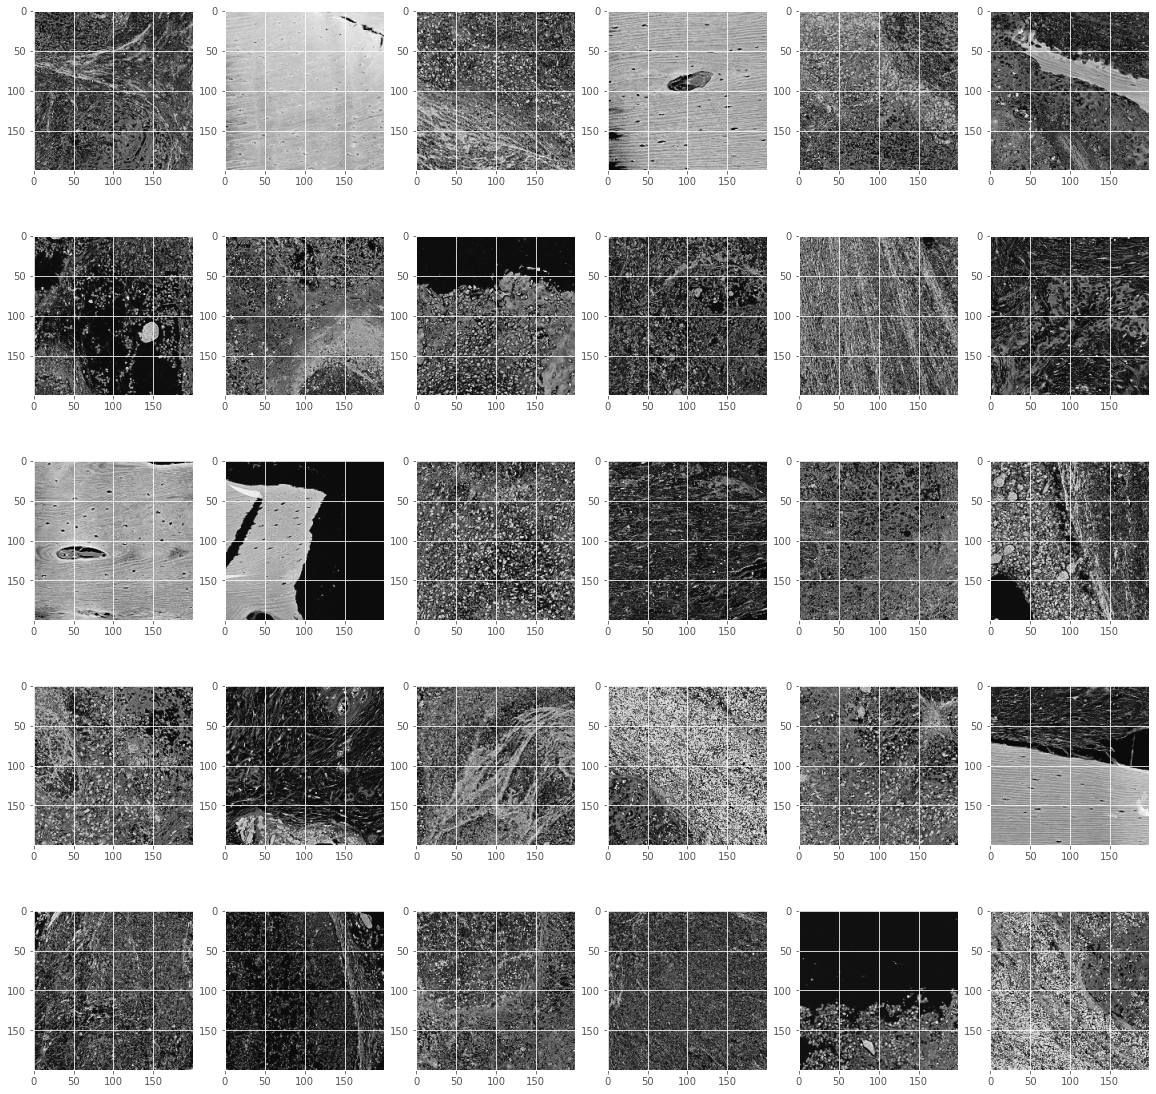

In [33]:
## plot some images  

import cv2 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(images[i],cmap='Greys')

## Preprocessing data

In [57]:
data[1].value_counts()

Non-Tumor             248
Non-Viable-Tumor      221
Viable                213
viable: non-viable     15
Name: 1, dtype: int64

In [26]:
data.reset_index() # resetting the index after gathering from training data.

index                                 0                 1
0        0        Case 3 A15-29596-14862.jpg  Non-Viable-Tumor
1        1        Case 3 A17-26576-11618.jpg  Non-Viable-Tumor
2        2        Case 3 A16-29058-10941.jpg  Non-Viable-Tumor
3        3        Case 3 A15-38347-25444.jpg  Non-Viable-Tumor
4        4        Case 3 A14-37149-17859.jpg            Viable
..     ...                               ...               ...
692     45   Case 48 - P5 C18-33022-7038.jpg            Viable
693     46  Case 48 - P5 C15-48808-15798.jpg            Viable
694     47  Case 48 - P5 C17-40131-29101.jpg         Non-Tumor
695     48   Case 48 - P5 C17-37994-3037.jpg            Viable
696     49  Case 48 - P5 C18-32717-16452.jpg            Viable

[697 rows x 3 columns]

In [129]:
nvt = data[data[1]=='Non-Viable-Tumor'][0]


In [130]:
nvt1 = data[data[1]=='Viable'][0]
nvt1

4            Case 3 A14-37149-17859.jpg
54           Case 3 A14-37149-17859.jpg
104          Case 3 A14-37149-17859.jpg
5            Case 4 C31-35324-16735.jpg
8            Case 4 C31-32902-21086.jpg
                     ...               
44     Case 48 - P5 C15-41629-16134.jpg
45      Case 48 - P5 C18-33022-7038.jpg
46     Case 48 - P5 C15-48808-15798.jpg
48      Case 48 - P5 C17-37994-3037.jpg
49     Case 48 - P5 C18-32717-16452.jpg
Name: 0, Length: 213, dtype: object

In [131]:
nvt2 = data[data[1]=='Non-Tumor'][0]

In [132]:
nvt3 = data[data[1]=='viable: non-viable'][0]

In [135]:
nvt=nvt.str.replace(' ','-')

#replacing the  empty spaces with - to match the image 
nvt1=nvt1.str.replace(' ','-')
nvt2=nvt2.str.replace(' ','-')
nvt3=nvt3.str.replace(' ','-')

# replacing the extra values with --- in the name
nvt1=nvt1.str.replace('---','-')
nvt2=nvt2.str.replace('---','-')
nvt3=nvt3.str.replace('---','-')

In [136]:
nvt1

4          Case-3-A14-37149-17859.jpg
54         Case-3-A14-37149-17859.jpg
104        Case-3-A14-37149-17859.jpg
5          Case-4-C31-35324-16735.jpg
8          Case-4-C31-32902-21086.jpg
                    ...              
44     Case-48-P5-C15-41629-16134.jpg
45      Case-48-P5-C18-33022-7038.jpg
46     Case-48-P5-C15-48808-15798.jpg
48      Case-48-P5-C17-37994-3037.jpg
49     Case-48-P5-C18-32717-16452.jpg
Name: 0, Length: 213, dtype: object

In [137]:
#converting the series object to list 
nvt=nvt.tolist()
nvt1=nvt1.tolist()
nvt2=nvt2.tolist()
nvt3=nvt3.tolist()

In [138]:
# testing if the list object can be identified with string name.
if ('Case-4-C31-33075-15855.jpg' in nvt3):
    print("viable: non-viable")

viable: non-viable


In [139]:
# directing each image to its respective folder based on its label.
import os
import shutil

# Set the directory containing the images you want to move

target_directory = "/Users/bharathamadhukiran/Desktop/capstone/non-viable"
target_directory1="/Users/bharathamadhukiran/Desktop/capstone/viable"
target_directory2="/Users/bharathamadhukiran/Desktop/capstone/Non-Tumor"
target_directory3="/Users/bharathamadhukiran/Desktop/capstone/viable-non-viable"

rootdir = '/Users/bharathamadhukiran/Desktop/capstone/Osteosarcoma-UT/Training-Set-1'
images=[];

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print(type(file))
        source_path=(os.path.join(subdir, file))
        #print(source_path)
        #print(files[1])
        if (file in nvt):
            target_path = os.path.join(target_directory, file)
            print(target_path,"non-viable")
            # Move the file to the new location
            shutil.move(source_path, target_path)
            
        elif (file in nvt1):
            target_path1 = os.path.join(target_directory1, file)
            print(target_path1,"viable")
            # Move the file to the new location
            shutil.move(source_path, target_path1)
        
        elif (file in nvt2):
            target_path2 = os.path.join(target_directory2, file)
            print(target_path2,"Non-Tumor")
            # Move the file to the new location
            shutil.move(source_path, target_path2)
        
        elif (file in nvt3):
            target_path3 = os.path.join(target_directory3, file)
            print(target_path3,"viable: non-viable")
            # Move the file to the new location
            shutil.move(source_path, target_path3)


/Users/bharathamadhukiran/Desktop/capstone/Non-Tumor/Case-48-P5-C14-55921-40389.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C13-47517-9280.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C14-44941-18452.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C14-54171-23668.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C14-59148-13815.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C13-64007-12122.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C13-36274-5595.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C13-45972-4022.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/Non-Tumor/Case-48-P5-C13-42974-19458.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C13-40217-4387.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/viable/Case-48-P5-C14-50416-27346.jpg viable
/Users/bharathamadhukira

# TEST DATA


In [155]:
test_data=pd.DataFrame()
import os
rootdir = '/Users/bharathamadhukiran/Desktop/capstone/Osteosarcoma-UT/Training-Set-2'
test_images=[];
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        img = cv2.imread(os.path.join(subdir, file))
        if img is not None:
            continue
        elif file=='.DS_Store':
            continue
        else:
            print("Could not load image:", file)
            df2=pd.read_csv(str(subdir)+'/'+str(file),header=None)
            df2.head()
            test_data=pd.concat([test_data,df2])

Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv
Could not load image: PathologistValidation.csv


In [146]:
test_data.head()

0                 1
0  Case 3 A17-12112-17050.jpg  Non-Viable-Tumor
1    Case 3 A17-4064-3304.jpg  Non-Viable-Tumor
2   Case 3 A14-20876-5533.jpg  Non-Viable-Tumor
3   Case 3 A16-9134-12603.jpg         Non-Tumor
4  Case 3 A16-18494-17234.jpg  Non-Viable-Tumor

In [147]:
test_data[1].value_counts()

Non-Tumor             393
Viable                152
Non-Viable-Tumor      118
viable: non-viable     46
Name: 1, dtype: int64

In [148]:
test_data.reset_index() # resetting the index after gathering from training data.

index                                 0                   1
0        0        Case 3 A17-12112-17050.jpg    Non-Viable-Tumor
1        1          Case 3 A17-4064-3304.jpg    Non-Viable-Tumor
2        2         Case 3 A14-20876-5533.jpg    Non-Viable-Tumor
3        3         Case 3 A16-9134-12603.jpg           Non-Tumor
4        4        Case 3 A16-18494-17234.jpg    Non-Viable-Tumor
..     ...                               ...                 ...
704     46   Case 48 - P5 C13-35186-4450.jpg              Viable
705     47  Case 48 - P5 C14-34559-25361.jpg           Non-Tumor
706     48  Case 48 - P5 C16-16775-22744.jpg           Non-Tumor
707     49   Case 48 - P5 C16-38254-8571.jpg  viable: non-viable
708     50  Case 48 - P5 C14-28814-14922.jpg  viable: non-viable

[709 rows x 3 columns]

In [152]:
tnvt = test_data[test_data[1]=='Non-Viable-Tumor'][0]
tnvt1 = test_data[test_data[1]=='Viable'][0]
tnvt2 = test_data[test_data[1]=='Non-Tumor'][0]
tnvt3 = test_data[test_data[1]=='viable: non-viable'][0]

In [153]:
tnvt=tnvt.str.replace(' ','-')

#replacing the  empty spaces with - to match the image 
tnvt1=tnvt1.str.replace(' ','-')
tnvt2=tnvt2.str.replace(' ','-')
tnvt3=tnvt3.str.replace(' ','-')

# replacing the extra values with --- in the name
tnvt1=tnvt1.str.replace('---','-')
tnvt2=tnvt2.str.replace('---','-')
tnvt3=tnvt3.str.replace('---','-')

In [154]:
#converting the series object to list 
tnvt=tnvt.tolist()
tnvt1=tnvt1.tolist()
tnvt2=tnvt2.tolist()
tnvt3=tnvt3.tolist()

In [158]:
# directing each image to its respective folder based on its label.
import os
import shutil

# Set the directory containing the images you want to move

target_directory = "/Users/bharathamadhukiran/Desktop/capstone/test/non-viable"
target_directory1="/Users/bharathamadhukiran/Desktop/capstone/test/viable"
target_directory2="/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor"
target_directory3="/Users/bharathamadhukiran/Desktop/capstone/test/viable-non-viable"

rootdir = '/Users/bharathamadhukiran/Desktop/capstone/Osteosarcoma-UT/Training-Set-2'
test_images=[];

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print(type(file))
        source_path=(os.path.join(subdir, file))
        #print(source_path)
        #print(files[1])
        if (file in tnvt):
            target_path = os.path.join(target_directory, file)
            print(target_path,"non-viable")
            # Move the file to the new location
            shutil.move(source_path, target_path)
            
        elif (file in tnvt1):
            target_path1 = os.path.join(target_directory1, file)
            print(target_path1,"viable")
            # Move the file to the new location
            shutil.move(source_path, target_path1)
        
        elif (file in tnvt2):
            target_path2 = os.path.join(target_directory2, file)
            print(target_path2,"Non-Tumor")
            # Move the file to the new location
            shutil.move(source_path, target_path2)
        
        elif (file in tnvt3):
            target_path3 = os.path.join(target_directory3, file)
            print(target_path3,"viable: non-viable")
            # Move the file to the new location
            shutil.move(source_path, target_path3)


/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A16-17478-7786.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-3-A15-18345-32676.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-3-A14-2833-14298.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A16-15703-4602.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A17-4064-3304.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-3-A17-7799-34542.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A16-20932-16777.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A15-12529-2824.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-3-A15-2939-11262.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/non-viable/Case-3-A16-18494-17234.jpg non-viable
/Users/bharathamadhukiran/Desktop/capstone/tes

/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C52-6011-11096.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/viable/Case-48-P5-C13-33156-9373.jpg viable
/Users/bharathamadhukiran/Desktop/capstone/test/viable-non-viable/Case-48-P5-C13-33285-9932.jpg viable: non-viable
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C48-9864-11549.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-48-P5-C13-30344-16782.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C52-14134-24972.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C48-11401-19048.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C52-18944-30575.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C52-7119-24770.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/Case-4-C48-13927-22247.jpg Non-Tumor
/Users/bharathamadhukiran/Deskto

/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B28-14508-11698.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B34-12550-21771.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B27-9346-28187.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B12-16776-15675.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B34-22505-3850.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B12-7286-14751.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B28-11927-9548.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B27-3237-19787.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B12-15791-34183.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B12-7917-18432.jpg Non-Tumor
/Users/bharathamadhukiran/Desktop/capstone/test/Non-Tumor/P9-B28-15856-19913.jpg Non-Tumor
/User

In [159]:
test_images=np.array(test_images)

In [160]:
type(test_images)

numpy.ndarray

# Segment images

In [161]:
pip install segmentation-models

     |████████████████████████████████| 50 kB 6.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [162]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [172]:
from matplotlib import pyplot as plt
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

(-0.5, 1023.5, 1023.5, -0.5)

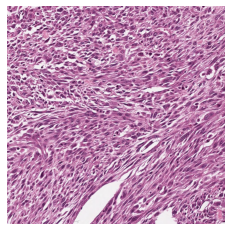

In [193]:
image = cv2.imread('/Users/bharathamadhukiran/Desktop/capstone/train/viable/Case-4-C31-27678-14221.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

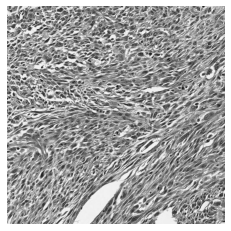

In [194]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")
plt.axis('off')

True

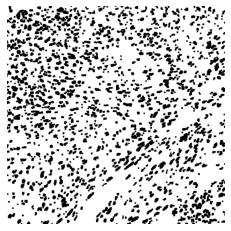

In [195]:
_ , mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((7, 7), np.uint8))
plt.imshow(mask, cmap = "gray")
plt.axis('off')
cv2.imwrite('thresholding.png', cv2.hconcat([image, np.stack((mask, mask, mask), axis=2)]))

(-0.5, 1023.5, 1023.5, -0.5)

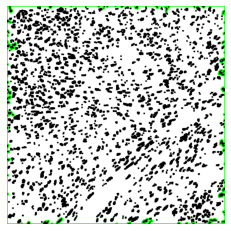

In [196]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off')

In [197]:
filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    # if area is higher than 3000:
    if area > 3000:
        filtered_contours.append(contour)
        # get mean color of contour:
        masked = np.zeros_like(image[:, :, 0])  # This mask is used to get the mean color of the specific bead (contour), for kmeans
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

df_mean_color.head()

B_mean      G_mean      R_mean
4  173.502814  133.885673  186.441611

True

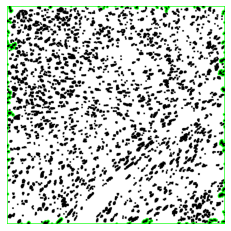

In [198]:
contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]))


In [199]:
km = KMeans( n_clusters=1)
df_mean_color['label'] = km.fit_predict(df_mean_color)

In [200]:
def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

(-0.5, 2047.5, 1023.5, -0.5)

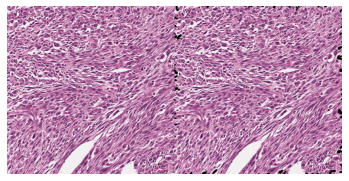

In [201]:
img = image.copy()
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    img = cv2.hconcat([img, masked_image])

cv2.imwrite('color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off')

##### NOTE: Above is the process of how we segment images. since it is difficult to perform each and every image accurately we have used Apeer.io to mask our image data according to the labels.


#### SVM Model

In [1]:
import pandas as pd
import numpy as np
import cv2

# Load the CSV file
df = pd.read_csv("/Users/bharathamadhukiran/Desktop/capstone/ML_Features_1144.csv")

# Extract the file names and labels
file_names = df['image.name'].tolist()
labels = df['classification'].tolist()

# Load the images and convert them to NumPy arrays
import os
rootdir = '/Users/bharathamadhukiran/Downloads/Osteosarcoma-UT'
images=[];
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        img = cv2.imread(os.path.join(subdir, file))
        if img is not None:
            # normalize values
            #img = img / 255
            img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            img_gray2 = cv2.resize(img_gray, (200, 200))
            
            images.append(img_gray2)
            print("Loaded image with shape:", img_gray2.shape)
            #print(os.path.join(subdir, file))         
        elif file=='.DS_Store':
            continue 

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (200, 200)
Loaded image with shape: (20

In [2]:
df.head()

Unnamed: 0              image.name  X.x  Blue.count  red.count  \
0           1  Case 3 A10-10547-25283  548       16611      52475   
1           2  Case 3 A10-10566-40206  549       93148     282307   
2           3  Case 3 A10-13444-20223  550      107853     198888   
3           4  Case 3 A10-14507-37285  551       58609     208594   
4           5  Case 3 A10-14726-26052  552       13419      56428   

   Blue.percentage  red.percentage  total.clusters  average.clusters.32  \
0         1.584148        5.004406             123             0.112844   
1         8.883286       26.922894             143             0.131193   
2        10.285664       18.967438             166             0.152294   
3         5.589390       19.893074             153             0.140367   
4         1.279736        5.381393              81             0.074312   

        area  ...  Texture_SumEntropy_3_90  Texture_SumVariance_3_0  \
0  81.252033  ...                 1.269986                 4.985359   
1  69.671329  ...                 1.689416                24.047674   
2  75.361446  ...                 1.668477                23.754724   
3  68.398693  ...                 1.839611                20.562092   
4  82.679012  ...                 1.197788                 3.977051   

   Texture_SumVariance_3_135  Texture_SumVariance_3_45  \
0                   4.654160                  4.499266   
1                  23.805470                 23.886660   
2                  23.636317                 23.338890   
3                  20.061859                 19.908849   
4                   3.552465                  3.481328   

   Texture_SumVariance_3_90  Texture_Variance_3_0  Texture_Variance_3_135  \
0                  4.718412              1.545288                1.538943   
1                 23.949666              6.115417                6.105633   
2                 23.673391              6.170840                6.175347   
3                 20.037982              5.341032                5.336172   
4                  3.593105              1.252694                1.253966   

   Texture_Variance_3_45  Texture_Variance_3_90  classification  
0               1.542346               1.541256       Non-Tumor  
1               6.105821               6.109401       Non-Tumor  
2               6.176097               6.171856       Non-Tumor  
3               5.342228               5.338274       Non-Tumor  
4               1.253085               1.253502       Non-Tumor  

[5 rows x 69 columns]

In [3]:
images = np.array(images)

In [4]:
resized_images = []
for img in images:
    resized = cv2.resize(img, (224, 224))
    resized_images.append(resized)
resized_images = np.array(resized_images)

# Normalize the pixel values to a specific range
normalized_images = resized_images / 255.0

# Apply data augmentation to increase the variety of images
# Example of applying horizontal flipping
augmented_images = []
for img in normalized_images:
    flipped = cv2.flip(img, 1)
    augmented_images.append(flipped)
augmented_images = np.array(augmented_images)

### Train test split

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_images, labels, test_size=0.2, random_state=42)


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier on the training data
clf = SVC(kernel='linear')
clf.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

# Test the classifier on the testing data and compute accuracy
y_pred = clf.predict(X_test.reshape((X_test.shape[0], -1)))
accuracy = accuracy_score(y_test, y_pred)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation metrics for the classifier
from sklearn.metrics import precision_score, recall_score, f1_score

# y_true and y_pred are your true and predicted labels, respectively
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_test, average='weighted')


print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))


Accuracy: 0.419
Precision: 0.419
Recall: 0.285
F1-score: 1.000


### CNN Model

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_dir="/Users/bharathamadhukiran/Desktop/capstoneimages/edu/train"
test_dir="/Users/bharathamadhukiran/Desktop/capstoneimages/edu/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 533 images belonging to 3 classes.
Found 556 images belonging to 3 classes.


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator))

/var/folders/44/8ksnn70j1630h7xtcj55hjdh0000gn/T/ipykernel_50596/3936577013.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
17/17 [==============================] - 29s 2s/step - loss: 1.9739 - accuracy: 0.3715 - val_loss: 0.9985 - val_accuracy: 0.6133
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 0.9879 - accuracy: 0.5084 - val_loss: 0.9486 - val_accuracy: 0.4496
Epoch 3/10
17/17 [==============================] - 36s 2s/step - loss: 0.8305 - accuracy: 0.6417 - val_loss: 0.5945 - val_accuracy: 0.7500
Epoch 4/10
17/17 [==============================] - 39s 2s/step - loss: 0.6619 - accuracy: 0.7486 - val_loss: 0.7463 - val_accuracy: 0.6655
Epoch 5/10
17/17 [==============================] - 38s 2s/step - loss: 0.6326 - accuracy: 0.7617 - val_loss: 0.8476 - val_accuracy: 0.6061
Epoch 6/10
17/17 [==============================] - 38s 2s/step - loss: 0.5998 - accuracy: 0.7917 - val_loss: 0.6044 - val_accuracy: 0.7572
Epoch 7/10
17/17 [==============================] - 38s 2s/step - loss: 0.4693 - accuracy: 0.8105 - val_loss: 0.5210 - val_accuracy: 0.7770
Epoch 8/10
17/17 [==

In [13]:
scores = model.evaluate_generator(test_generator, steps=len(test_generator))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/var/folders/44/8ksnn70j1630h7xtcj55hjdh0000gn/T/ipykernel_50596/357582349.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 0.5842437744140625
Test accuracy: 0.7194244861602783


In [15]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict_generator(test_generator, steps=len(test_generator))
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

target_names = ['Non-Tumor', 'non-viable', 'viable']
print(classification_report(y_true, y_pred, target_names=target_names))

/var/folders/44/8ksnn70j1630h7xtcj55hjdh0000gn/T/ipykernel_50596/960636353.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=len(test_generator))


              precision    recall  f1-score   support

   Non-Tumor       0.53      0.40      0.46       315
  non-viable       0.23      0.26      0.25       117
      viable       0.21      0.31      0.25       124

    accuracy                           0.35       556
   macro avg       0.32      0.32      0.32       556
weighted avg       0.39      0.35      0.37       556



/var/folders/44/8ksnn70j1630h7xtcj55hjdh0000gn/T/ipykernel_50596/366718859.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, len(test_generator))


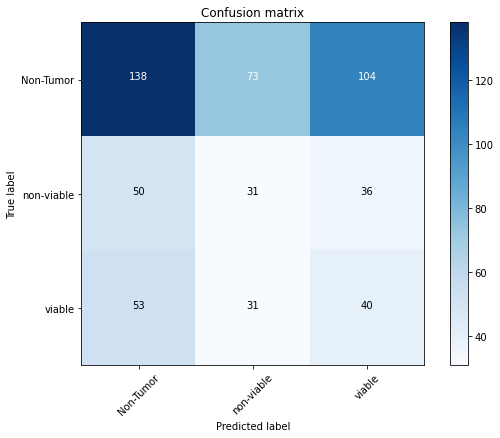

In [16]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels
y_true = test_generator.classes

# Make the predictions
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Get the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Define the class names
class_names = ['Non-Tumor', 'non-viable', 'viable']

# Plot the confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'), horizontalalignment="center", color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### Mobile-Net

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [20]:
data_dir = "/Users/bharathamadhukiran/Desktop/capstoneimages/edu"
Osteosarcoma=[]
for file in os.listdir(data_dir):
    Osteosarcoma+=[file]
print(Osteosarcoma)
print(len(Osteosarcoma))

['.DS_Store', 'test', 'train']
3


In [21]:
img_height,img_width=128,128
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator1 = train_datagen.flow_from_directory(train_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')
test_generator1 = train_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 533 images belonging to 3 classes.
Found 556 images belonging to 3 classes.


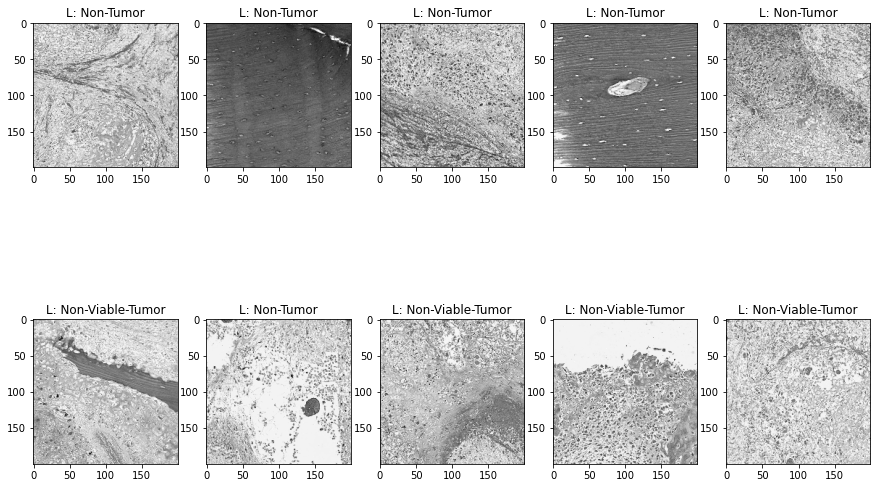

In [30]:
# Plot the first few images
fig, axs = plt.subplots(2, 5, figsize=(15, 10))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(images[i],cmap='gray')
    ax.set_title(f"L: {labels[i]}")
plt.show()

In [31]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [32]:
def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name =    prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x
def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name = prefix +'dw_relu')(x)
    return x
def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters=out_channels,kernel_size = 1,   padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x
def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = add([x,y])
    return y
def MobileNet(input_shape = (100,100,1), n_classes=4):
    input = Input (input_shape)
    x = Conv2D(32,3,strides=(2,2),padding='same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name='conv1_relu')(x)
    # 17 Bottlenecks
    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 320, stride = 1,block_id = 17)
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)
    x = GlobalAveragePooling2D(name='global_average_pool')(x)
    output = Dense(n_classes,activation='softmax')(x)
    model = Model(input, output)
    return model
n_classes = 3
input_shape = (128,128,3)

model = MobileNet(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 32)   128         ['conv2d_9[0][0]']               
                                                                                                  
 conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['conv1_bn[0][0]']           

 block_4_compress (Conv2D)      (None, 16, 16, 32)   4608        ['block_4_dw_relu[0][0]']        
                                                                                                  
 block_4_compress_bn (BatchNorm  (None, 16, 16, 32)  128         ['block_4_compress[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_5_expand (Conv2D)        (None, 16, 16, 192)  6144        ['block_4_compress_bn[0][0]']    
                                                                                                  
 block_5_expand_bn (BatchNormal  (None, 16, 16, 192)  768        ['block_5_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_5_e

                                                                                                  
 block_8_dw_relu (ReLU)         (None, 8, 8, 384)    0           ['block_8_dw_bn[0][0]']          
                                                                                                  
 block_8_compress (Conv2D)      (None, 8, 8, 64)     24576       ['block_8_dw_relu[0][0]']        
                                                                                                  
 block_8_compress_bn (BatchNorm  (None, 8, 8, 64)    256         ['block_8_compress[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_3 (Add)                    (None, 8, 8, 64)     0           ['block_7_compress_bn[0][0]',    
                                                                  'block_8_compress_bn[0][0]']    
          

                                                                                                  
 block_12_depthwise_conv (Depth  (None, 8, 8, 576)   5184        ['block_12_expand_relu[0][0]']   
 wiseConv2D)                                                                                      
                                                                                                  
 block_12_dw_bn (BatchNormaliza  (None, 8, 8, 576)   2304        ['block_12_depthwise_conv[0][0]']
 tion)                                                                                            
                                                                                                  
 block_12_dw_relu (ReLU)        (None, 8, 8, 576)    0           ['block_12_dw_bn[0][0]']         
                                                                                                  
 block_12_compress (Conv2D)     (None, 8, 8, 96)     55296       ['block_12_dw_relu[0][0]']       
          

 block_16_expand (Conv2D)       (None, 4, 4, 960)    153600      ['add_8[0][0]']                  
                                                                                                  
 block_16_expand_bn (BatchNorma  (None, 4, 4, 960)   3840        ['block_16_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_16_expand_relu (ReLU)    (None, 4, 4, 960)    0           ['block_16_expand_bn[0][0]']     
                                                                                                  
 block_16_depthwise_conv (Depth  (None, 4, 4, 960)   8640        ['block_16_expand_relu[0][0]']   
 wiseConv2D)                                                                                      
                                                                                                  
 block_16_

In [33]:
val = pd.read_csv('ML_Features_1144.csv')
#labels = tf.reshape(test_generator, [20, 4])

In [41]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy',precision,recall])
hist=model.fit(train_generator1,epochs=23,batch_size=25, validation_data=test_generator1)

Epoch 1/23
27/27 [==============================] - 28s 940ms/step - loss: 0.4398 - accuracy: 0.8762 - precision_1: 0.7193 - recall_1: 0.7153 - val_loss: 1.4845 - val_accuracy: 0.6763 - val_precision_1: 0.6787 - val_recall_1: 0.6763
Epoch 2/23
27/27 [==============================] - 30s 1s/step - loss: 0.3128 - accuracy: 0.9099 - precision_1: 0.9175 - recall_1: 0.8968 - val_loss: 3.3256 - val_accuracy: 0.5665 - val_precision_1: 0.5665 - val_recall_1: 0.5665
Epoch 3/23
27/27 [==============================] - 34s 1s/step - loss: 0.1890 - accuracy: 0.9362 - precision_1: 0.9411 - recall_1: 0.9287 - val_loss: 3.9778 - val_accuracy: 0.5665 - val_precision_1: 0.5665 - val_recall_1: 0.5665
Epoch 4/23
27/27 [==============================] - 35s 1s/step - loss: 0.1685 - accuracy: 0.9362 - precision_1: 0.9414 - recall_1: 0.9343 - val_loss: 3.1189 - val_accuracy: 0.6043 - val_precision_1: 0.6040 - val_recall_1: 0.5953
Epoch 5/23
27/27 [==============================] - 34s 1s/step - loss: 0.136

In [42]:
model.evaluate(test_generator1)
model.save("model/Mobilenet.h5")

28/28 [==============================] - 7s 256ms/step - loss: 2.6364 - accuracy: 0.7554 - precision_1: 0.7554 - recall_1: 0.7554


In [45]:
scores = model.evaluate(test_generator1, steps=len(test_generator1))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

28/28 [==============================] - 7s 252ms/step - loss: 2.6364 - accuracy: 0.7554 - precision_1: 0.7554 - recall_1: 0.7554
Test loss: 2.6363558769226074
Test accuracy: 0.7553957104682922


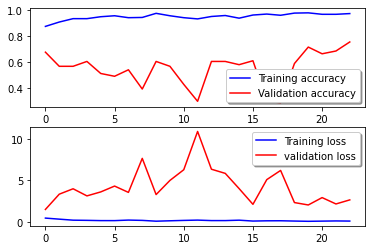

In [46]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

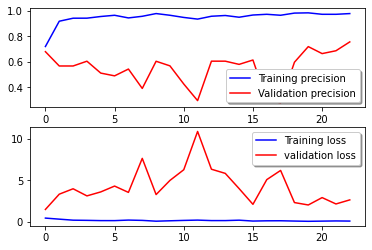

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['precision_1'], color='b', label="Training precision")
ax[0].plot(hist.history['val_precision_1'], color='r',label="Validation precision")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=
                      True)

In [50]:
filenames = test_generator1.filenames
nb_samples = len(filenames)
model_predict = model.predict_generator(test_generator1,steps = nb_samples, verbose=2)

/var/folders/44/8ksnn70j1630h7xtcj55hjdh0000gn/T/ipykernel_50596/209628354.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  model_predict = model.predict_generator(test_generator1,steps = nb_samples, verbose=2)


556/556 - 8s - 8s/epoch - 14ms/step


In [51]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[214  30  71]
 [ 86  11  20]
 [ 87   6  31]]


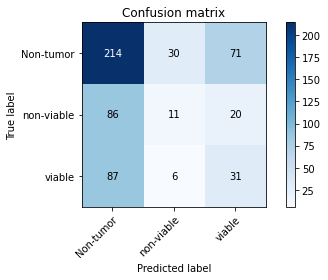

In [71]:
y_true = test_generator.classes
y_pred = model_predict.argmax(axis=1)
plot_confusion_matrix(y_true, y_pred, classes=['Non-tumor','non-viable','viable'],
                      title='Confusion matrix')
plt.show()

## BONE CNN

In [178]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

In [179]:
def tumor_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In [180]:
import os
def load_data(dir_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = [];count=0
    image_width, image_height = image_size
    for directory in dir_list:
        for filename in listdir(directory):
            #print(filename)
            #count+=1
            # load the image
            image = cv2.imread(directory + '//' + filename)
            # crop the brain and ignore the unnecessary rest part of the image
            image = tumor_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-9:] == 'non-tumor':
                y.append([1])
            else:
                y.append([0])
              
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [181]:
#'/Users/bharathamadhukiran/Downloads/binary'

augmented_path='/Users/bharathamadhukiran/Downloads/binary/images'#augmented data contains both tumor and non tumor images
augmented_yes = augmented_path + '/tumor' 
augmented_no = augmented_path + '/non-tumor'

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 1089
X shape is: (1089, 240, 240, 3)
y shape is: (1089, 1)


In [182]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f" Tumor: {label_to_str(label)}")
        plt.show()

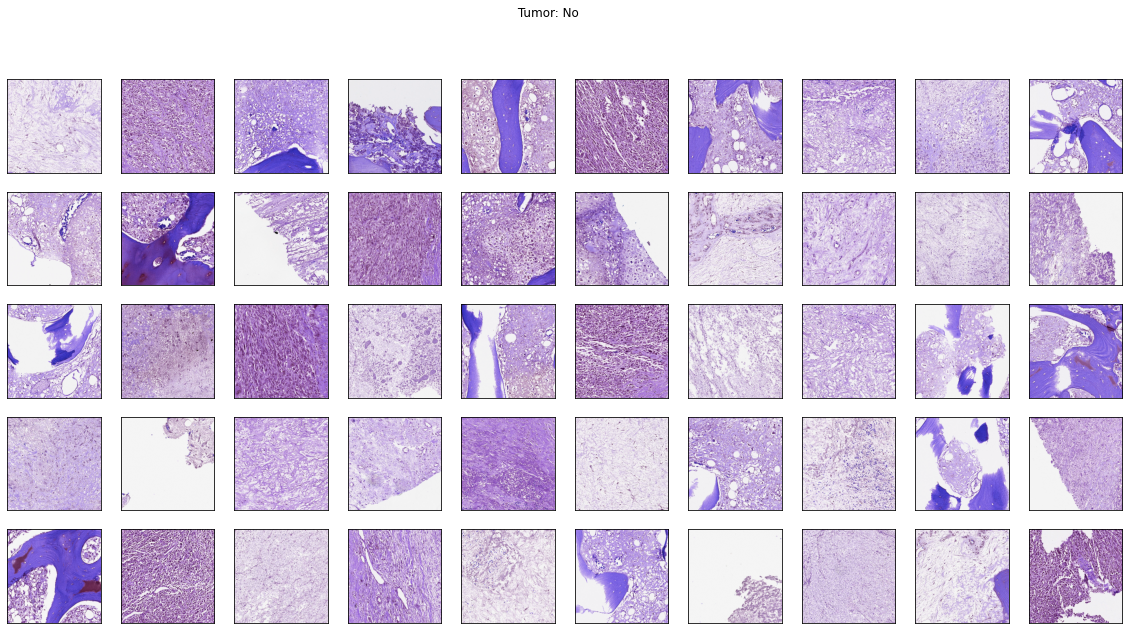

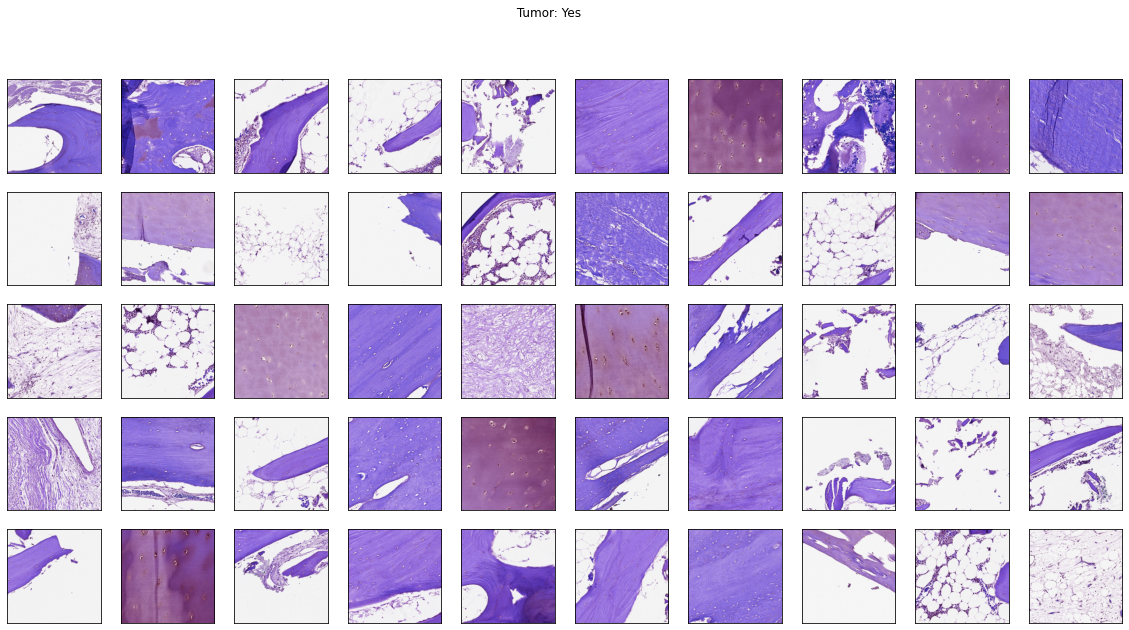

In [183]:
plot_sample_images(X, y)

In [184]:
def split_data(X, y, test_size=0.2):
       
    """
    Splits data into training, development and test sets.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    Returns:
        X_train: A numpy array with shape = (#_train_examples, image_width, image_height, #_channels)
        y_train: A numpy array with shape = (#_train_examples, 1)
        X_val: A numpy array with shape = (#_val_examples, image_width, image_height, #_channels)
        y_val: A numpy array with shape = (#_val_examples, 1)
        X_test: A numpy array with shape = (#_test_examples, image_width, image_height, #_channels)
        y_test: A numpy array with shape = (#_test_examples, 1)
    """
    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [185]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [186]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 762
number of development examples = 164
number of test examples = 163
X_train shape: (762, 240, 240, 3)
Y_train shape: (762, 1)
X_val (dev) shape: (164, 240, 240, 3)
Y_val (dev) shape: (164, 1)
X_test shape: (163, 240, 240, 3)
Y_test shape: (163, 1)


In [187]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [188]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

In [189]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BoneDetectionModel')
    
    return model

In [190]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

In [191]:
model = build_model(IMG_SHAPE)

In [192]:
model.summary()

Model: "BoneDetectionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 240, 240, 3)]     0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 244, 244, 3)      0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 238, 238, 32)      4736      
                                                                 
 bn0 (BatchNormalization)    (None, 238, 238, 32)      128       
                                                                 
 activation (Activation)     (None, 238, 238, 32)      0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 59, 59, 32)        0         
                                                

In [193]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [194]:
# tensorboard
log_file_name = f'bone_tumor_detection_cnn_{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')

In [195]:
# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_accuracy:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'))

In [196]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.4213 - accuracy: 0.5289

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.53.model/assets


24/24 [==============================] - 30s 1s/step - loss: 1.4213 - accuracy: 0.5289 - val_loss: 0.7644 - val_accuracy: 0.5305
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.7598

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.53.model/assets


24/24 [==============================] - 36s 2s/step - loss: 0.5231 - accuracy: 0.7598 - val_loss: 1.1274 - val_accuracy: 0.5305
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.4302 - accuracy: 0.8215

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.53.model/assets


24/24 [==============================] - 37s 2s/step - loss: 0.4302 - accuracy: 0.8215 - val_loss: 1.2894 - val_accuracy: 0.5305
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.4563 - accuracy: 0.7887

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.53.model/assets


24/24 [==============================] - 39s 2s/step - loss: 0.4563 - accuracy: 0.7887 - val_loss: 1.1767 - val_accuracy: 0.5305
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8386

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-05-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-05-0.53.model/assets


24/24 [==============================] - 40s 2s/step - loss: 0.4052 - accuracy: 0.8386 - val_loss: 0.9792 - val_accuracy: 0.5305
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.8465

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-06-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-06-0.53.model/assets


24/24 [==============================] - 42s 2s/step - loss: 0.3927 - accuracy: 0.8465 - val_loss: 0.9799 - val_accuracy: 0.5305
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.8281

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-07-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-07-0.53.model/assets


24/24 [==============================] - 40s 2s/step - loss: 0.3923 - accuracy: 0.8281 - val_loss: 1.0695 - val_accuracy: 0.5305
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.3326 - accuracy: 0.8543

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-08-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-08-0.53.model/assets


24/24 [==============================] - 39s 2s/step - loss: 0.3326 - accuracy: 0.8543 - val_loss: 1.4488 - val_accuracy: 0.5305
Epoch 9/10
24/24 [==============================] - ETA: 0s - loss: 0.3304 - accuracy: 0.8753

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-09-0.66.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-09-0.66.model/assets


24/24 [==============================] - 40s 2s/step - loss: 0.3304 - accuracy: 0.8753 - val_loss: 0.6595 - val_accuracy: 0.6646
Epoch 10/10
24/24 [==============================] - ETA: 0s - loss: 0.3421 - accuracy: 0.8609

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-10-0.57.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-10-0.57.model/assets


24/24 [==============================] - 39s 2s/step - loss: 0.3421 - accuracy: 0.8609 - val_loss: 0.9168 - val_accuracy: 0.5671
Elapsed time: 0:6:24.2


In [197]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 0.2984 - accuracy: 0.8845

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.53.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.53.model/assets


24/24 [==============================] - 34s 1s/step - loss: 0.2984 - accuracy: 0.8845 - val_loss: 1.0494 - val_accuracy: 0.5305
Epoch 2/3
24/24 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.8976

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.60.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.60.model/assets


24/24 [==============================] - 38s 2s/step - loss: 0.2855 - accuracy: 0.8976 - val_loss: 0.9348 - val_accuracy: 0.5976
Epoch 3/3
24/24 [==============================] - ETA: 0s - loss: 0.2475 - accuracy: 0.9147

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.65.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.65.model/assets


24/24 [==============================] - 39s 2s/step - loss: 0.2475 - accuracy: 0.9147 - val_loss: 0.7214 - val_accuracy: 0.6524
Elapsed time: 0:1:51.8


In [198]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.8609

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.73.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.73.model/assets


24/24 [==============================] - 34s 1s/step - loss: 0.3357 - accuracy: 0.8609 - val_loss: 0.5565 - val_accuracy: 0.7256
Epoch 2/3
24/24 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9239

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.57.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.57.model/assets


24/24 [==============================] - 40s 2s/step - loss: 0.2265 - accuracy: 0.9239 - val_loss: 0.8990 - val_accuracy: 0.5671
Epoch 3/3
24/24 [==============================] - ETA: 0s - loss: 0.2470 - accuracy: 0.9081

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.59.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.59.model/assets


24/24 [==============================] - 42s 2s/step - loss: 0.2470 - accuracy: 0.9081 - val_loss: 0.9322 - val_accuracy: 0.5854
Elapsed time: 0:1:56.4


In [199]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9265

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.79.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-01-0.79.model/assets


24/24 [==============================] - 37s 2s/step - loss: 0.2247 - accuracy: 0.9265 - val_loss: 0.4710 - val_accuracy: 0.7927
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.9278

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.59.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-02-0.59.model/assets


24/24 [==============================] - 46s 2s/step - loss: 0.2113 - accuracy: 0.9278 - val_loss: 1.0766 - val_accuracy: 0.5854
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.9239

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.54.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-03-0.54.model/assets


24/24 [==============================] - 40s 2s/step - loss: 0.2185 - accuracy: 0.9239 - val_loss: 1.4052 - val_accuracy: 0.5427
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9409

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.54.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-04-0.54.model/assets


24/24 [==============================] - 41s 2s/step - loss: 0.1923 - accuracy: 0.9409 - val_loss: 1.0518 - val_accuracy: 0.5366
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9580

INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-05-0.73.model/assets


INFO:tensorflow:Assets written to: models/cnn-parameters-improvement-05-0.73.model/assets


24/24 [==============================] - 41s 2s/step - loss: 0.1615 - accuracy: 0.9580 - val_loss: 0.5693 - val_accuracy: 0.7317
Elapsed time: 0:3:26.7


In [200]:
history = model.history.history

In [201]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


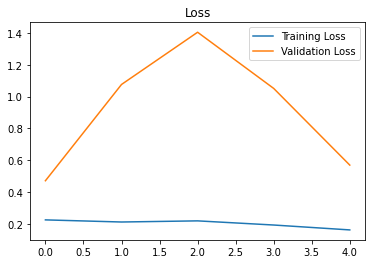

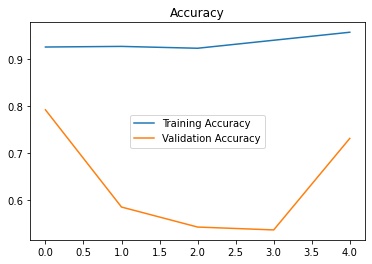

In [203]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history) 

### Load the best accurate model

In [218]:
best_model = load_model(filepath='/Users/bharathamadhukiran/Desktop/capstone/models/cnn-parameters-improvement-09-0.66.model')

In [219]:
best_model.metrics_names

['loss', 'accuracy']

In [220]:
loss, acc = best_model.evaluate(x=X_test, y=y_test)

6/6 [==============================] - 1s 198ms/step - loss: 0.6809 - accuracy: 0.6380


In [221]:
y_test_prob = best_model.predict(X_test)

6/6 [==============================] - 1s 213ms/step


#### F1 score for test data.

In [222]:
f1score = compute_f1_score(y_test, y_test_prob)
print(f"F1 score test data: {f1score}")

F1 score test data: 0.7230046948356809


In [224]:
y_val_prob = best_model.predict(X_val)
#y_val_prob

6/6 [==============================] - 1s 221ms/step


In [225]:
#y_val

#### F1 score for validation data

In [226]:
f1score_val = compute_f1_score(y_val, y_val_prob)
print(f"F1 score validation data: {f1score_val}")

F1 score validation data: 0.7577092511013216


In [227]:
#from sklearn.metrics import classification_report
#print(classification_report(y_val, y_val_prob))

import numpy as np
from sklearn.metrics import classification_report

# True labels
true_labels = y_val

# Flatten the true labels
true_labels = true_labels.ravel()

# Predicted probabilities
predicted_probabilities = y_val_prob

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
predicted_labels = (predicted_probabilities >= threshold).astype(int)

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.96      0.30      0.46        77
           1       0.61      0.99      0.76        87

    accuracy                           0.66       164
   macro avg       0.79      0.64      0.61       164
weighted avg       0.78      0.66      0.62       164



# Confusion Matrix for model

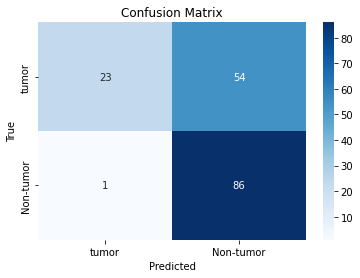

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# True labels
true_labels = y_val

# Flatten the true labels
true_labels = true_labels.ravel()

# Predicted probabilities
predicted_probabilities = y_val_prob

# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
predicted_labels = (predicted_probabilities >= threshold).astype(int)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['tumor', 'Non-tumor']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Data Distribution

In [234]:
def data_percentage(y):
    
    m=len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive* 100.0)/ m
    neg_prec = (n_negative* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {n_negative}") 

In [235]:
data_percentage(y)

Number of examples: 1089
Percentage of positive examples: 49.219467401285584%, number of pos examples: 536
Percentage of negative examples: 50.780532598714416%, number of neg examples: 553


In [236]:
print("Training Data:")
data_percentage(y_train)
print("Validation Data:")
data_percentage(y_val)
print("Testing Data:")
data_percentage(y_test)

Training Data:
Number of examples: 762
Percentage of positive examples: 48.55643044619423%, number of pos examples: 370
Percentage of negative examples: 51.44356955380577%, number of neg examples: 392
Validation Data:
Number of examples: 164
Percentage of positive examples: 53.048780487804876%, number of pos examples: 87
Percentage of negative examples: 46.951219512195124%, number of neg examples: 77
Testing Data:
Number of examples: 163
Percentage of positive examples: 48.466257668711656%, number of pos examples: 79
Percentage of negative examples: 51.533742331288344%, number of neg examples: 84


### Let's check the model performance on a random image

In [238]:
def get_class_label(class_index):
    return "Non-Tumor" if class_index == 1 else "Tumor"

def predict_image(path):
    # Preprocess the image
    image = cv2.imread(path)
    #image = crop_brain_contour(image, plot=False)
    image = cv2.resize(image, dsize=(240, 240), interpolation=cv2.INTER_CUBIC)
    image = image / 255.
    image = np.expand_dims(image, axis=0) 

    # Make the prediction
    prediction = best_model.predict(image)

    # Get the predicted probability and class label
    predicted_prob = prediction[0][0]  # Assuming binary classification
    predicted_class = 1 if predicted_prob >= 0.5 else 0
    predicted_label = get_class_label(predicted_class)

    # Plot the image
    plt.imshow(image[0])
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_label}, Probability of No Tumor: {predicted_prob:.4f}")
    plt.show()

    # Return the prediction probability and class label
    return predicted_prob, predicted_label

1/1 [==============================] - 0s 34ms/step


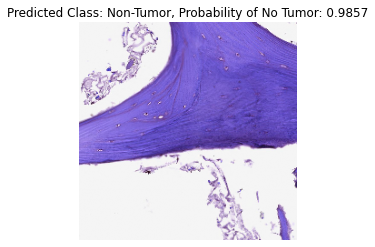

In [240]:
# Assuming 'image' is your input image and 'best_model' is the trained model
path = '/Users/bharathamadhukiran/Downloads/binary/images/non-tumor/Case-3-A7-10464-40567.jpg'
prediction_prob, prediction_class = predict_image(path)

1/1 [==============================] - 0s 31ms/step


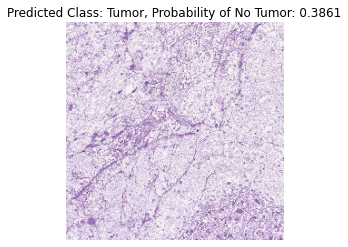

In [244]:
# Assuming 'image' is your input image and 'best_model' is the trained model
path = '/Users/bharathamadhukiran/Downloads/binary/images/tumor/Case-3-A7-31694-7282.jpg'
prediction_prob, prediction_class = predict_image(path)

##### We have used Apeer.io tool to mask our image data . This tool helps in training the images with inout of some images which have been marked manually.So by levraging this tool we have masked image data. 

# Mask-R-CNN

In [247]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

DATA_PATH = '/Users/bharathamadhukiran/Downloads/binary/'

image_path_tumor = os.path.join(DATA_PATH, 'images/tumor')
image_path_non_tumor = os.path.join(DATA_PATH, 'images/non-tumor')
mask_path_tumor = os.path.join(DATA_PATH, 'masks/tumor')
mask_path_non_tumor = os.path.join(DATA_PATH, 'masks/non-tumor')

# Get the list of image files from tumor and non-tumor folders
image_files_tumor = os.listdir(image_path_tumor)
image_files_non_tumor = os.listdir(image_path_non_tumor)

# Combine the image files from both tumor and non-tumor folders
image_files = image_files_tumor + image_files_non_tumor

# Shuffle the image files
random.shuffle(image_files)

X = np.zeros((len(image_files), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(image_files), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)



print('Resizing images and masks')
for n, image_file in tqdm(enumerate(image_files), total=len(image_files)):
    if image_file == '.DS_Store':
        continue

    # Determine whether the image is from the tumor or non-tumor folder
    if image_file in image_files_tumor:
        image_path = os.path.join(image_path_tumor, image_file)
        mask_path = os.path.join(mask_path_tumor, image_file.replace('.jpg', '_finalprediction.ome.tiff'))
    else:
        image_path = os.path.join(image_path_non_tumor, image_file.replace('_finalprediction.ome.tiff','.jpg'))
        mask_path = os.path.join(mask_path_non_tumor, image_file.replace('.jpg', '_finalprediction.ome.tiff'))
    
    

    img = imread(image_path)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img
    
    if not os.path.exists(mask_path):
        continue

    mask = imread(mask_path)
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    mask_slice = mask[..., 0]  # Select a specific
    mask_slice = np.expand_dims(mask_slice, axis=-1)
    y[n] = mask_slice
    

print('Done!')


Resizing images and masks


100%|███████████████████████████████████████| 1089/1089 [44:21<00:00,  2.44s/it]

Done!


In [254]:
print("Shape of the mask image and original image data")
print("X:",X.shape,"y:",y.shape)

Shape of the mask image and original image data
X: (1089, 256, 256, 3) y: (1089, 256, 256, 1)


### Train test split of data

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
image_x = random.randint(0, len(X_train))
plt.axis("off")
imshow(X_train[image_x])

plt.axis("off")
imshow(np.squeeze(y_train[image_x]))
plt.show()

# Model building

In [258]:
num_classes = 1

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
b1 = tf.keras.layers.BatchNormalization()(c1)
r1 = tf.keras.layers.ReLU()(b1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(r1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
b2 = tf.keras.layers.BatchNormalization()(c2)
r2 = tf.keras.layers.ReLU()(b2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(r2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
b3 = tf.keras.layers.BatchNormalization()(c3)
r3 = tf.keras.layers.ReLU()(b3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(r3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
b4 = tf.keras.layers.BatchNormalization()(c4)
r4 = tf.keras.layers.ReLU()(b4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(r4)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
b4 = tf.keras.layers.BatchNormalization()(c4)
r4 = tf.keras.layers.ReLU()(b4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(r4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
b5 = tf.keras.layers.BatchNormalization()(c5)
r5 = tf.keras.layers.ReLU()(b5)
c5 = tf.keras.layers.Dropout(0.3)(r5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
u6 = tf.keras.layers.BatchNormalization()(u6)
u6 = tf.keras.layers.ReLU()(u6)

 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u6)
u7 = tf.keras.layers.concatenate([u7, c3])
u7 = tf.keras.layers.BatchNormalization()(u7)
u7 = tf.keras.layers.ReLU()(u7)

 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(u7)
u8 = tf.keras.layers.concatenate([u8, c2])
u8 = tf.keras.layers.BatchNormalization()(u8)
u8 = tf.keras.layers.ReLU()(u8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(u8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
u9 = tf.keras.layers.BatchNormalization()(u9)
u9 = tf.keras.layers.ReLU()(u9)

 
outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(u9)

In [259]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [260]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [261]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
46/46 [==============================] - 180s 4s/step - loss: 0.5784 - accuracy: 0.7502 - val_loss: 0.8292 - val_accuracy: 0.8611
Epoch 2/25
46/46 [==============================] - 189s 4s/step - loss: 0.4268 - accuracy: 0.8502 - val_loss: 0.4456 - val_accuracy: 0.8616
Epoch 3/25
46/46 [==============================] - 181s 4s/step - loss: 0.4171 - accuracy: 0.8505 - val_loss: 0.4709 - val_accuracy: 0.8115
Epoch 4/25
46/46 [==============================] - 176s 4s/step - loss: 0.4149 - accuracy: 0.8506 - val_loss: 0.4260 - val_accuracy: 0.8615
Epoch 5/25
46/46 [==============================] - 174s 4s/step - loss: 0.4140 - accuracy: 0.8507 - val_loss: 0.4089 - val_accuracy: 0.8616
Epoch 6/25
46/46 [==============================] - 171s 4s/step - loss: 0.4138 - accuracy: 0.8507 - val_loss: 0.4143 - val_accuracy: 0.8616
Epoch 7/25
46/46 [==============================] - 174s 4s/step - loss: 0.4127 - accuracy: 0.8508 - val_loss: 0.3988 - val_accuracy: 0.8616
Epoch 8/25
46

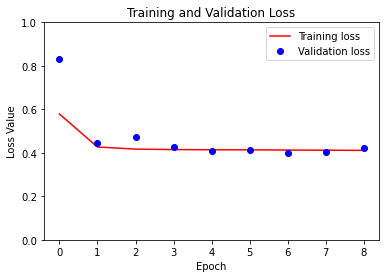

In [262]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure()
plt.plot( loss, 'r', label='Training loss')
plt.plot( val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

1/1 [==============================] - 0s 424ms/step


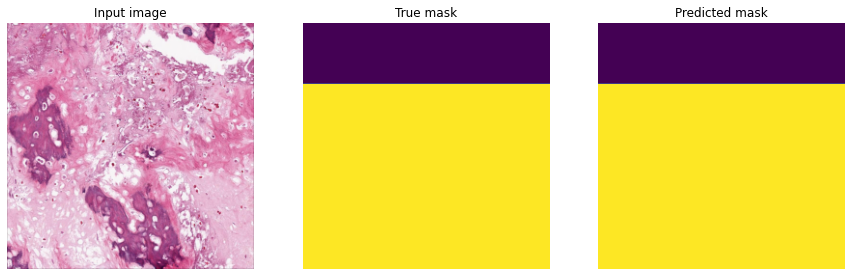

In [263]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()
  
i = random.randint(0, len(X_test))
sample_image = X_test[i]
sample_mask = y_test[i]
prediction = model.predict(sample_image[tf.newaxis, ...])[0]
predicted_mask = (prediction > 0.4).astype(np.uint8)
display([sample_image, sample_mask,predicted_mask])

# Conclusion:

In conclusion, CNN as expected has performed well in the binary classification. For multi-class classification the results would have been better with more data.
The Unet model has demonstrated good performance for the segmentation task based on the masks provided to it.
The Unet model's advanced architecture, incorporating the concept of skip connections and encoder-decoder structures, has allowed it to excel in tasks such as image segmentation and medical imaging. Its ability to capture fine-grained details and accurately identify boundaries and features has contributed to its good performance. 
